 # <font color="blue">Submitted by: Kaspar Kadalipp </font>
# HW4. Skip-Lists, Trees

### <font color='orange'> Less important code is placed here</font>
### <font color='orange'> Report is below </font>

In [1]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import random
import math

In [2]:
def ex5():
    plt.subplots(figsize=(15, 15))
    point_list = [(0.04, 0.87), (0.06, 0.98), (0.08, 0.11), (0.15, 0.29),
                  (0.21, 0.05), (0.28, 0.23), (0.47, 0.66), (0.64, 0.78),
                  (0.67, 0.23), (0.73, 0.04), (0.78, 0.04), (0.81, 0.41),
                  (0.81, 0.93), (0.83, 0.29), (0.83, 0.53), (0.85, 0.64),
                  (0.88, 1.0), (0.94, 0.2), (0.96, 0.92), (0.98, 0.78)]
    for x, y in point_list:
        if x == 0.73 and y == 0.04:
            plt.annotate(f"{x, y}", (x-0.1, y + 0.01), size=14)
        elif y == 1:
            plt.annotate(f"{x, 1}", (x+0.01, y - 0.02), size=14)
        else:
            plt.annotate(f"{x, y}", (x+0.01, y+ 0.01), size=14)
    plt.vlines(.78, 0, 1, color="r") # (0.78, 0.04) x, y1, y2
    plt.hlines(.29, 0, .78, colors="b") # (0.15, 0.29) #y, x1, x2
    plt.vlines(.28, 0, .29, color="r") # (0.28, 0.23)
    plt.hlines(.11, 0, .28, colors="b") # (0.08, 0.11)
    plt.vlines(.21, 0, .11, color="r") # (0.21, 0.25)
    plt.hlines(.23, .28, .78, colors="b") # (0.67, 0.23)
    plt.vlines(.73, 0, .23, color="r")  # (0.73, 0.04)
    plt.vlines(.47, .29, 1, color="r") # (0.47, 0.66)
    plt.hlines(.78, .47, .78, colors="b") # (0.64, 0.78)
    plt.hlines(.98, 0, .47, colors="b") # (0.06, 0.98)
    plt.vlines(.04, .29, .98, color="r") # (0.04, 0.87)
    plt.hlines(.64, .78, 1, colors="b") # (0.85, 0.64)
    plt.vlines(.83, 0, .64, color="r") # (0.83, 0.53)
    plt.hlines(.41, .78, .83, colors="b") # (0.81, 0.41)
    plt.hlines(.2, .83, 1, colors="b") # (0.94, 0.2)
    plt.vlines(.83, 0, .29, color="r") # (0.83, 0.29)
    plt.vlines(.96, .64, 1, color="r") # (0.96, 0.92)
    plt.hlines(1, .78, .96, colors="b") # (0.88, 1)
    plt.hlines(0.78, .96, 1, colors="b") # (0.98, 0.78)
    plt.vlines(.81, .64, 1, color="r") # (0.81, 0.93)

    plt.gca().add_patch(Rectangle((0,0),.5, .5,
                        facecolor='yellow',
                        alpha=0.3,
                        lw=4))
    plt.gca().add_patch(Rectangle((0,.5),.47, .48,
                    facecolor='gray',
                    alpha=0.3,
                    lw=4))
    plt.gca().add_patch(Rectangle((.5,0),.23, .23,
                    facecolor='gray',
                    alpha=0.3,
                    lw=4))
    plt.gca().add_patch(Rectangle((.5,.23),.28, .55,
                facecolor='gray',
                alpha=0.3,
                lw=4))
    plt.gca().add_patch(Rectangle((.47,.5),.03, .28,
                facecolor='gray',
                alpha=0.3,
                lw=4))
    plt.scatter([p[0] for p in point_list], [p[1] for p in point_list], color="black", s=55, zorder=2)
    plt.xticks([x / 10 for x in range(11)])
    plt.yticks([y / 10 for y in range(11)])
    plt.grid()
    plt.xlim(0, 1)
    plt.ylim(0, 1.01)
    plt.title("Finding Points in Quadrant [0, 0.5] x [0, 0.5] ", size = 20)
    plt.show()

In [3]:
def ex6(BST):
    plt.subplots(figsize=(10, 5))
    input_size = [25000, 50_000, 75_000, 100_000, 125_000, 150_000, 175_000, 200_000]
    heights = []
    for size in input_size:
        arr = [i for i in range(size)]
        iterations = 10
        avg_height = 0
        for i in range(iterations):
            random.shuffle(arr)
            tree = BST()
            for item in arr:
                tree.insert(item)
            avg_height +=tree.height
        heights.append(avg_height / iterations)

    plt.plot(input_size, heights, label=f"Binary Tree height", linewidth=4)
    plt.plot(input_size, [2.4*math.log2(x) for x in input_size], label=f"Height approximation $2.4log_2(n)$", linewidth=4)
    plt.grid()
    plt.xticks(ticks=input_size, labels=[f"{x:_}".replace("_", " ") for x in input_size])
    plt.legend(prop={'size': 14})
    plt.title('Randomly Built Binary Search Tree', fontsize=20)
    plt.xlabel('n (input size)', fontsize=16)
    plt.ylabel('y (height)', fontsize=16)
    plt.show()

# EX1

##### Insert 1, 5, 7, 30, 2, 4, 18, 32, 34, 36 into skip-list by simulating the process "on paper". Use a fair (actual) coin to provide the "depth" for each node. Show the skip-list after every insertion and the final list.

##### Comment on how the element is added to the list (thoroughly with at least one insertion, mentioning exact operations, e.g. what comparisons are made while adding, etc).

Adding 18:
Toss a coin - heads. Toss coin again - tails. This doesn't exceed height so no need to add new levels.
I search for 18. Start from level 2, 18 >  1 - scan forward, 18 > 4 - scan forward, 18 < $+\infty$ - move down, 18 < $+\infty$ - move down again, 18 > 5 - scan forward, 18 > 7 - scan forward, 18 < 30 - didn't find 18 but reached spot where 18 should be and I am already at level 0. Insert 18 between 7 and 30.  Add pointer from 4 to 18 in level 1 as well, because I got heads once.


![Inserting](https://i.imgur.com/39VIjQt.png)

##### Next, simulate search for 34. How many comparisons are performed?
Searching for 34 requires 6 comparisons.

![Searching](https://i.imgur.com/FpcOKPk.png)


# EX2

##### Insert the same values into a binary search tree in the same manner. Describe how the insertion is done and show at least a few intermediate steps in addition to the final tree. How skewed is the tree? Simulate search for 34. How many comparisons are performed?

Starting from the root, to insert an element I first check if the node is empty. If the node is empty I can insert the new value there. Otherwise, I compare value of the node to new element. If new value is smaller I go to the left subtree, otherwise I go to the right subtree. And repeat the process until I reach an empty node.

I can see that the tree is quite skewed to the right, only two 2 out of 10 have a left subtree.
Searching number 34 does 6 comparisons: 34 > 1 check right node, 34 > 5 check right node, 34 > 7 check right node, 34 > 30 check right node, 34 > 32 check right node, 34 == 34: value found.




![BST](https://i.imgur.com/WZDECiY.png)

# EX3

##### Now perform the same, but perform the AVL balancing. Show the tree before and after each balancing and mention how do you decide that the tree has to be balanced. How many rotations did you perform? Show the final tree. How many comparisons to search for 34?

##### Hint: for simulation, you could either code your own, use online/offline visualisation tool or an actual paper, in either case, make sure your figures are readable and consistent.

Inserting 1, 5, 7, 30, 2, 4, 18, 32, 34, 36 into an AVL tree performed 6 rotations.
Searching number 34 does 3 comparisons: 34 > 5 check right node, 34 > 32 check right node, 34 == 34 value found.

![AVL tree](https://i.imgur.com/WFFgG54.png)

# EX4

##### Now perform again the BST insertion, but follow red-black re-balancing on the way. Again, show the tree before and after every balancing and mention how do you decide that balancing needs to be done and how do you decide which case of balancing it is. How many rotations did you perform? Show the final tree. Simulate search for 34. How many comparisons are performed?

NIL leaves are omitted from visualisation to make it more readable.
Inserting 1, 5, 7, 30, 2, 4, 18, 32, 34, 36 into a red-black tree performed 6 rotations.
Searching number 34 does 3 comparisons: 34 > 18 check right node, 34 > 32 check right node, 34 == 34 value found.

![RB tree 1](https://i.imgur.com/gS7JYsm.png)

![RB tree 2](https://i.imgur.com/pvOO9rI.png)

![RB tree balancing](https://i.imgur.com/kJD2OKb.png)
<font color="gray">Source: Introduction to Algorithms by (The MIT Press) Thomas H. Cormen, page 316 </font>

# EX5

##### Build a kd-tree on the following 2D data. Split data by choosing median values. Draw the final 2-dimensional kd-tree (You don't have to give every step). You can either do this by hand or write a program to do it for you (or partially do it for you). How would you use this structure to find points in the quadrant [0, 0.5] x [0, 0.5] (bottom-left quadrant).

![KD tree](https://i.imgur.com/xdHHGFr.png)

![Find points in quadrant](https://i.imgur.com/bBRTGl0.png)

Yellow area is the [0, 0.5] x [0, 0.5] quadrant from where we want to find points.
But to find points in the quadrant, the gray area would have to be searched as well.
We don't include half the points in the search, however close to 70% of the area still has to be searched.

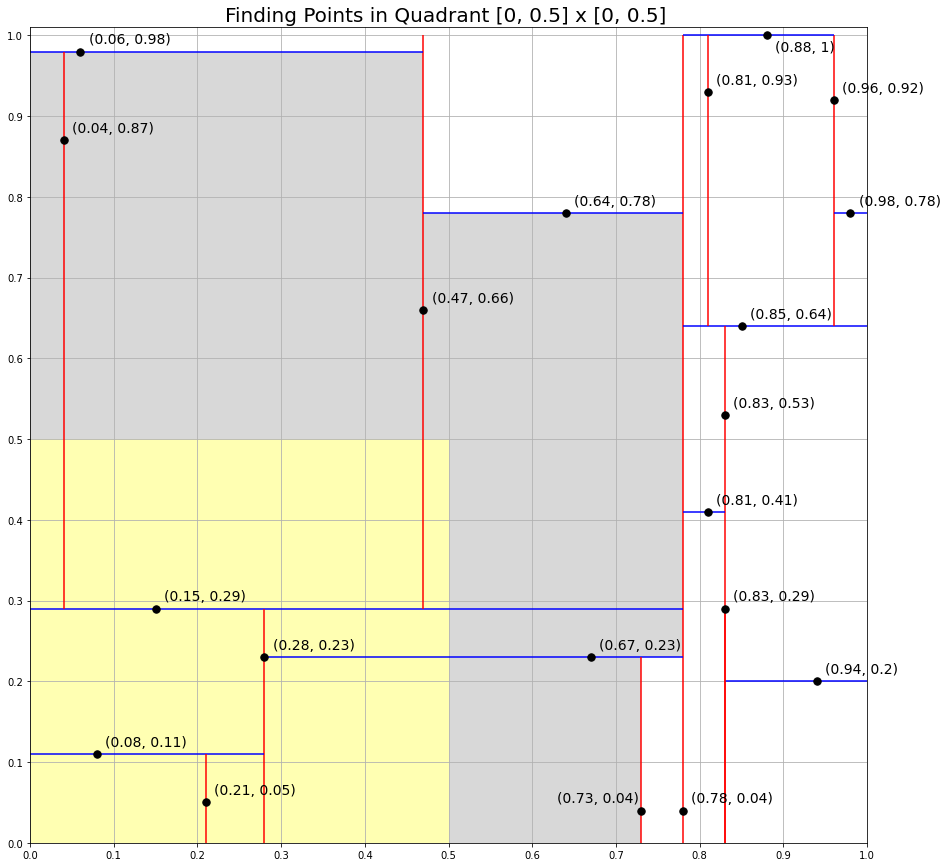

In [4]:
ex5()

# EX6

##### Implement a Binary Search Tree data structure. You can use either an array-based solution or struct/object-based. Implement at least insert and query functions.

##### Generate random integers. What is the height of an average random BST? Do this by using generated integers and shuffle them around and make new BST each time. Plot the distribution of tree heights over many random shuffles of data. What can you see? How does the random binary search tree height distribution change as you increase the size of data? Plot it! Can you give a formula to approximate the tree height based on dataset size?

##### Update/Hint: It is a good idea not to have repeat random numbers in your lists, which are being inserted into your tree. For our experiment, it would add extra noise to measurements. If you did the exercise before this update, it is OK, you can keep repeats!


I implemented insert and query functions for binary search tree data structure. Insert traverses tree until it reaches an empty node and inserts the element there. Search works similarly.
I created binary search trees using 25000, 50_000, 75_000, 100_000, 125_000, 150_000, 175_000, 200_000 unique elements and took average height of 5 attempts, shuffling elements every time.
As can be seen from the plot, the height is similar to approximation function $2.3log_2(n)$. From this I can conclude that the expected height of a randomly built binary search tree on n distinct keys is $O(log(n))$.
Proof of theorem 12.4 in Introduction to Algorithms by (The MIT Press) Thomas H. Cormen also shows that the expected height is $O(log(n))$.

In [5]:
class BST:
    root = None
    height = 0

    class Node:
        def __init__(self, value):
            self.value = value
            self.left = None
            self.right = None
        def __str__(self):
            return f"({self.value})"

    def insert(self, value):
        node_height = 0
        target = self.Node(value)
        y = None
        x = self.root
        while x is not None:
            y = x
            node_height += 1
            if target.value < x.value:
                x = x.left
            else:
                x = x.right

        if y is None: # tree was empty
            self.root = target
        else:
            if target.value < y.value:
                y.left = target
            else:
                y.right = target
            self.height = max(self.height, node_height)

    def search(self, target):
        x = self.root
        while x is not None and target != x.value:
            if target < x.value:
                x = x.left
            else:
                x = x.right
        return x

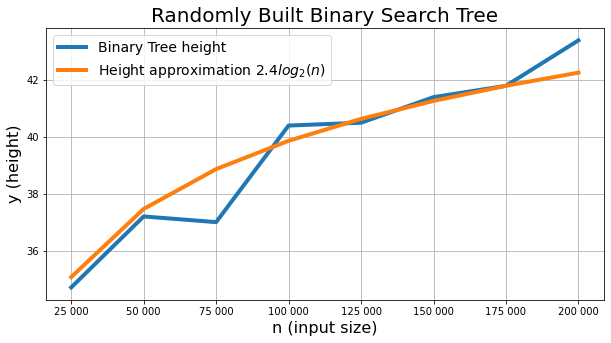

In [6]:
ex6(BST)

# EX7

#####  Imagine you are doing some stress-testing on various models of glass cups for a company. Your job is to determine the height from which the glass cups can be dropped and still not break. The setup for your experiment is to have a ladder with n rugs (steps) ad you want to find the highest rung from which you can drop a glass cup and not break it.

##### Suppose you are given a budget of k=2 glass cups. Describe a strategy for finding the highest safe rung that requires you to drop a glass cup at most f(n) times, for some function f(n) that grows slower than linearly.
Essentially, I have to devise a strategy to guess an integer x in range [0, n] while guessing a number larger than x at most 2 times, where x is the number I want to guess.
Target x can only be at some previous index where a glass broke, so I can pinpoint at most 2 possible locations.
To achieve that, I can use jump search. I begin from the beginning and start jumping ahead by $\sqrt{n}$ steps. When the first glass breaks I will know that x must be in the section I jumped over. Then I can start searching from the beginning of the section I jumped over using linear search. When second glass breaks I will have pinpointed x. If the glass broke at height x then the highest safe rug from which I can drop a glass and not break it must be at height x - 1.
Both steps look at most $\sqrt(n)$ items, therefore the complexity for this algorithm is $O(\sqrt{n})$, which is better than linear search.

##### Describe your strategy for k > 2 glass cups.
For k > 2 I can use binary search until there are 2 glasses remaining, then use jump search until there's only one glass left and finally use linear search.
But if k >= log(n) it's most efficient to use just binary search. Then I would have to drop a glass at most $log(x)$ times so the complexity would also be $O(log(n))$.


###### The optimal size of section is $\sqrt{n}$.

Let m be the jump size and n be the number of elements.

In the worst case, the maximum number of elements you have to check is the maximum number of jumps (n/m - 1) plus the number of elements between jumps (m), and the time you take is approximately proportional to the total number of elements you check.

The goal in choosing m, therefore, is to minimize: (n/m)+m-1.

The derivative by m is 1 - (n/m$^2$), and the minimum occurs where the derivative is 0:

1 - (n/m$^2$) = 0

(n/m$^2$) = 1

n = m$^2$

m = √n

<font color="gray">Source: stackoverflow.com/questions/69142582 </font>
